#Practical 3
Aim: Perform data Data Modeling.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/aids_3.csv')
pd.set_option('display.max_columns', None)
df.head()

,Product_ID,Occupation,Marital_Status,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20
0,P00069042,10,0,-0.177973,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P00248942,10,0,1.181756,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,P00087842,10,0,-1.561193,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,P00085442,10,0,-1.633858,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,P00285442,16,0,-0.257805,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547391 entries, 0 to 547390
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_ID                     547391 non-null  object 
 1   Occupation                     547391 non-null  int64  
 2   Marital_Status                 547391 non-null  int64  
 3   Purchase                       547391 non-null  float64
 4   Gender_M                       547391 non-null  int64  
 5   Age_18-25                      547391 non-null  int64  
 6   Age_26-35                      547391 non-null  int64  
 7   Age_36-45                      547391 non-null  int64  
 8   Age_46-50                      547391 non-null  int64  
 9   Age_51-55                      547391 non-null  int64  
 10  Age_55+                        547391 non-null  int64  
 11  City_Category_B                547391 non-null  int64  
 12  City_Category_C               

In [ ]:
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00298842,1
P00314742,1
P00054442,1


**a. Partition the data set, for example 75% of the records are included in the training data
set and 25% are included in the test data set.**

In [ ]:
from sklearn.model_selection import train_test_split
# Drop 'Product_ID' and separate features (X) and target variable (y)
X = df.drop(columns=['Product_ID', 'Purchase'])  # Drop Product_ID and Purchase from features
y = df['Purchase']  # Target variable

# Partition the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify the partition
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (410543, 35)
Testing Features Shape: (136848, 35)
Training Target Shape: (410543,)
Testing Target Shape: (136848,)


**b. Use a bar graph and other relevant graph to confirm your proportions.**

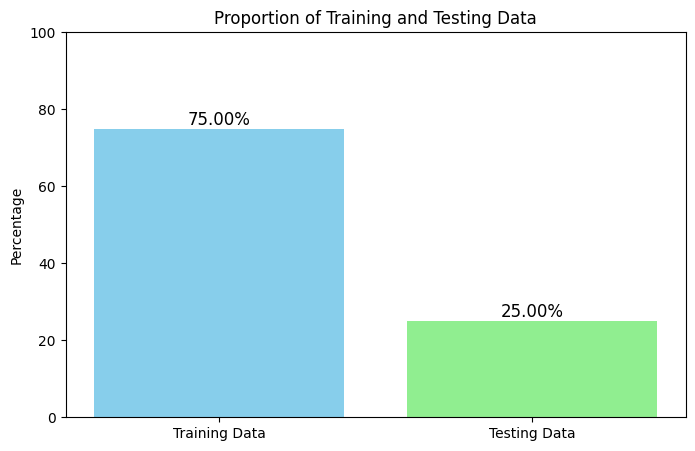

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportions
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Bar graph to show proportions
plt.figure(figsize=(8, 5))
plt.bar(['Training Data', 'Testing Data'], [train_percentage, test_percentage], color=['skyblue', 'lightgreen'])
plt.ylabel('Percentage')
plt.title('Proportion of Training and Testing Data')
plt.ylim(0, 100)
for i, v in enumerate([train_percentage, test_percentage]):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12)
plt.show()

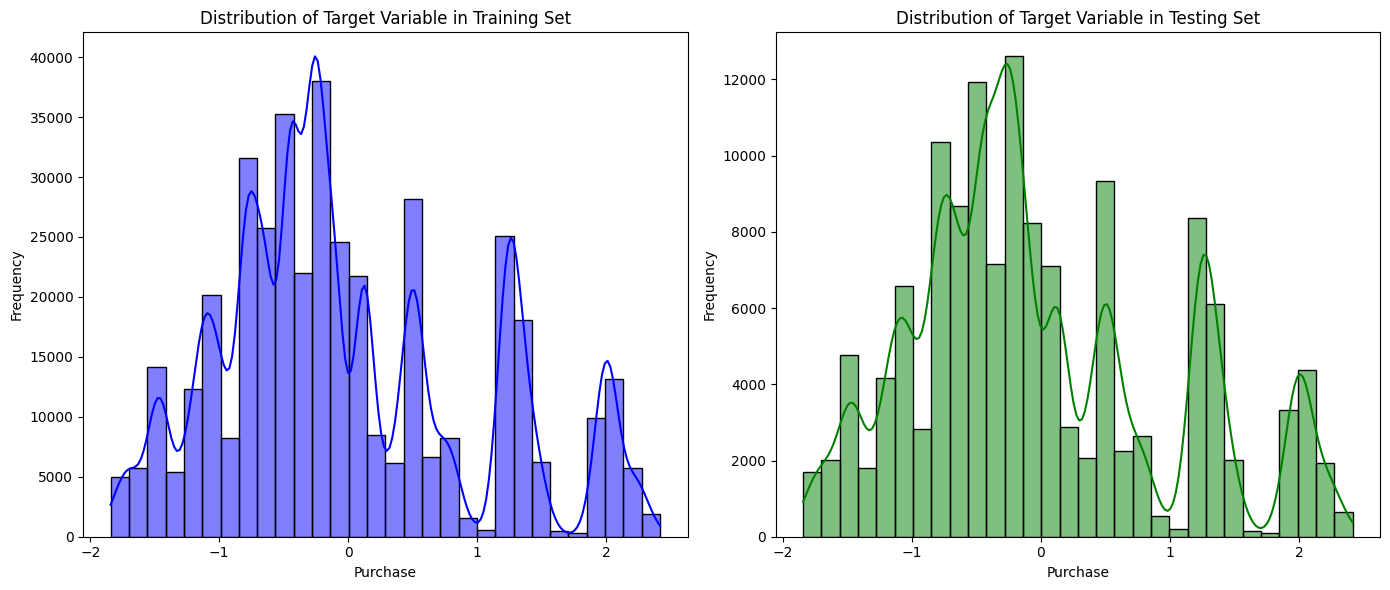

In [ ]:
# Visualize the distribution of the target variable in both sets
plt.figure(figsize=(14, 6))

# Distribution in Training set
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, bins=30, color='blue')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Purchase')
plt.ylabel('Frequency')

# Distribution in Testing set
plt.subplot(1, 2, 2)
sns.histplot(y_test, kde=True, bins=30, color='green')
plt.title('Distribution of Target Variable in Testing Set')
plt.xlabel('Purchase')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**c. Identify the total number of records in the training data set.**

In [ ]:
# Total number of records in the training dataset
total_training_records = len(X_train)

print(f"Total number of records in the training dataset: {total_training_records}")

Total number of records in the training dataset: 410543


In [ ]:
from statsmodels.stats.weightstats import ztest

# Extract 'Purchase' values for training and test sets
train_purchase = y_train
test_purchase = y_test

# Perform the two-sample Z-test
z_stat, p_value = ztest(train_purchase, test_purchase)

# Display the results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two samples are not significantly different.")

Z-Statistic: 0.36111530671653536
P-Value: 0.7180132511352447
Fail to reject the null hypothesis: The means of the two samples are not significantly different.


**The output indicates that the partitioning of your dataset is balanced.**

**Interpretation of the Output:**

Z-Statistic: 0.3611 suggests a very small difference between the means of the training and test datasets.

P-Value: 0.7180 is much greater than the significance level (α = 0.05), so we fail to reject the null hypothesis.